# Left_hip(SA)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model ,models, layers, optimizers, utils
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf           
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

In [2]:
print(tf.__version__)

2.9.0


In [3]:
# tf.compat.v1.reset_default_graph()
# keras.backend.clear_session()

In [4]:
#GPU 용량 할당시키기 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2 GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]) # limit in megabytes
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
sheet = pd.read_csv(r'AII_normal_patime2.csv', index_col = 0)
sheet = sheet.dropna()
# sheet


from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [6]:
angle = "left_hip_angle"

In [7]:
number_num = sheet[["num", angle]]

In [8]:
number = sheet[["num", angle]]
number

,num,left_hip_angle
2,1,25.519553
3,1,30.669766
4,1,29.965428
6,1,1.452460
7,1,1.018002
...,...,...
14983,30,10.641360
14984,30,7.017702
14985,30,1.111645
14986,30,29.884778


In [11]:
num = number["num"]
num = np.array(num)
num = list(dict.fromkeys(num))

In [12]:
train_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,29,30]

# Train

In [9]:
# epochs = 100
# batch = 32
# lr = 0.0001

In [10]:
# def cudnn_lstm_model():
#     lstm_ae = models.Sequential()
#     # Encoder
#     lstm_ae.add(layers.LSTM(32, activation='sigmoid', input_shape=(1000, 1), return_sequences=True))
#     lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
#     lstm_ae.add(layers.LSTM(16, activation='sigmoid', return_sequences=False))
#     lstm_ae.add(layers.RepeatVector(1))

#     # Decoder
#     lstm_ae.add(layers.LSTM(16, activation='sigmoid', return_sequences=True))
#     lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
#     lstm_ae.add(layers.LSTM(32, activation='sigmoid', return_sequences=True))
#     lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))
#     # lstm_ae.summary()
#     return lstm_ae

# model = cudnn_lstm_model()

In [11]:
# lstm_ae = models.Sequential()
# # Encoder
# lstm_ae.add(layers.LSTM(32, activation='relu', input_shape=(1000, 1), return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=False))
# lstm_ae.add(layers.RepeatVector(1))

# # Decoder
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=True))
# lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))

# lstm_ae.summary()

In [12]:
# for i in num:
#     number_num = number[number["num"]== i].dropna()
#     number_num = number_num[[angle]]
#     number_num = scaler.fit_transform(number_num)
#     number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
#     lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))
#     history = lstm_ae.fit(number_num, number_num, epochs=epochs, batch_size=batch)
    
#     plt.plot(history.history['loss'], label='train loss')
#     plt.legend()
#     plt.xlabel('Epoch'); plt.ylabel('loss')
#     plt.show()

# Pridict

In [13]:
lstm_ae = tf.keras.models.load_model('lstm_ae_left_hip(100_32_32_4_16_0.0001)-11.h5')
lstm_ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 32)          4352      
                                                                 
 dropout (Dropout)           (None, 1000, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVector  (None, 1, 16)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (None, 1, 16)             0         
                                                        

number :  1
10/10 [==============================] - 0s 4ms/step
(303,)


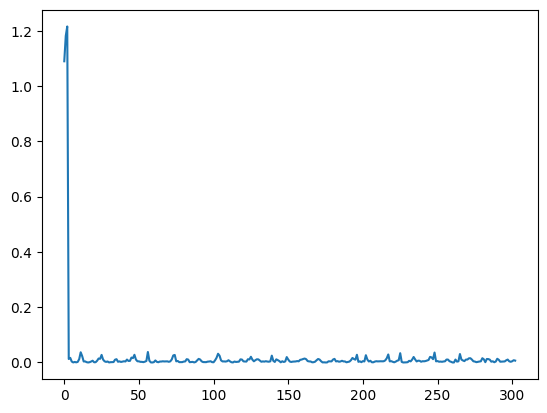

Reconstruction error threshold: 1.2157590908043556
number :  2
16/16 [==============================] - 0s 4ms/step
(504,)


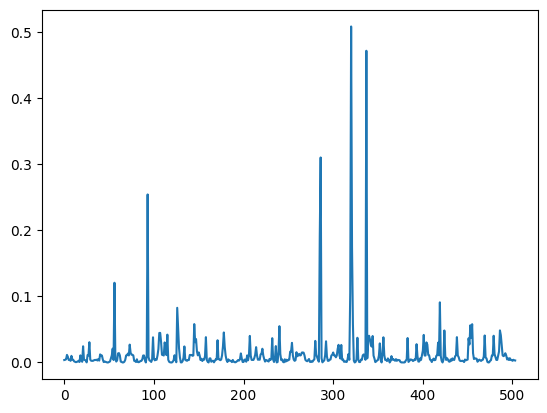

Reconstruction error threshold: 0.5082798189576503
number :  3
17/17 [==============================] - 0s 4ms/step
(535,)


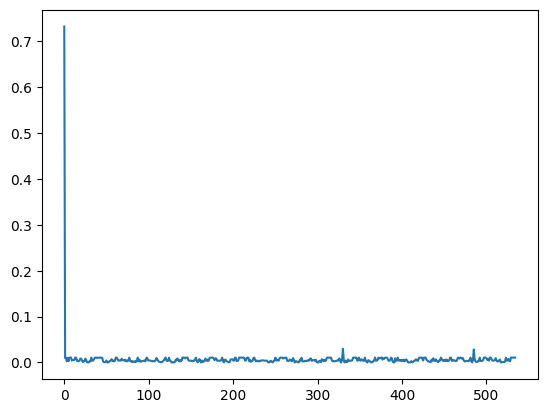

Reconstruction error threshold: 0.7327221098491733
number :  4
23/23 [==============================] - 0s 4ms/step
(717,)


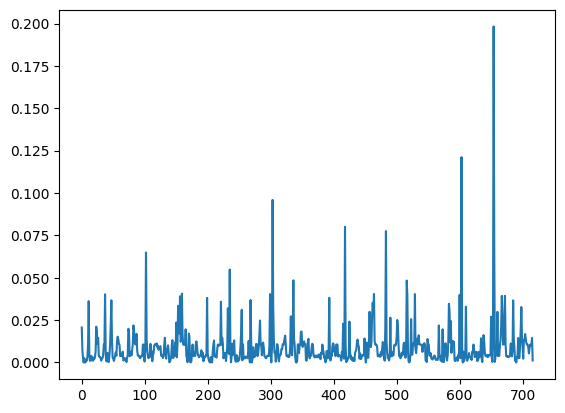

Reconstruction error threshold: 0.19827413313277256
number :  5
24/24 [==============================] - 0s 4ms/step
(741,)


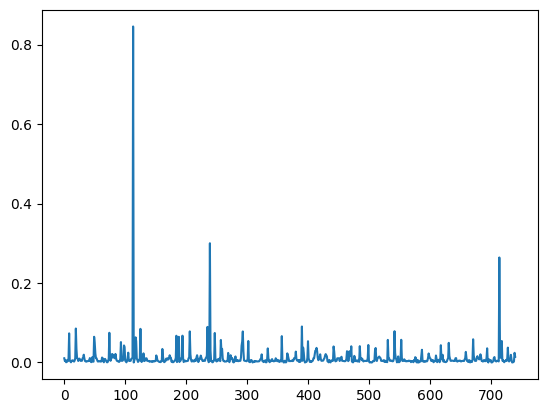

Reconstruction error threshold: 0.8457184741279135
number :  6
27/27 [==============================] - 0s 4ms/step
(853,)


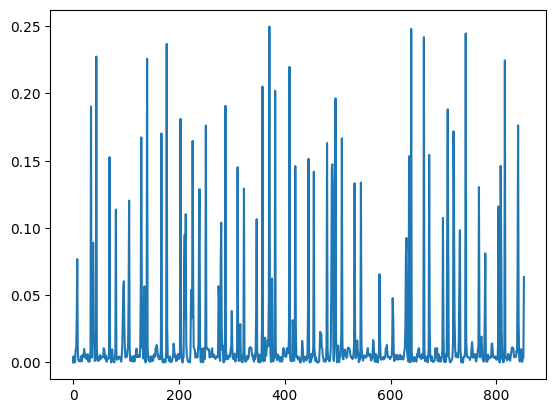

Reconstruction error threshold: 0.24979845857424546
number :  7
27/27 [==============================] - 0s 4ms/step
(845,)


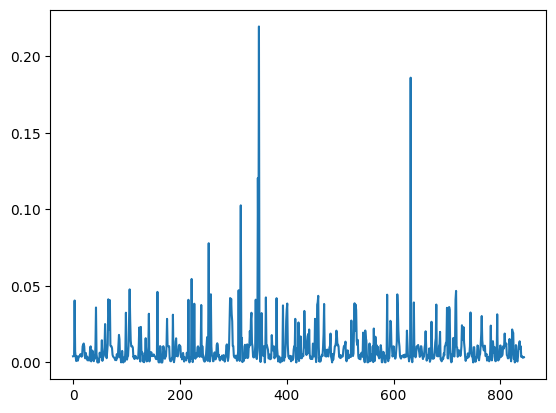

Reconstruction error threshold: 0.21960989449558851
number :  8
25/25 [==============================] - 0s 4ms/step
(773,)


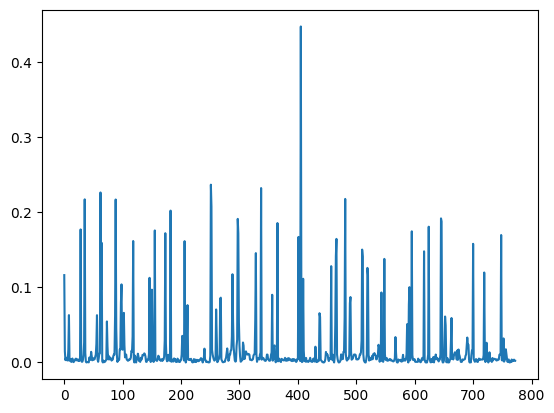

Reconstruction error threshold: 0.4475107222163109
number :  9
21/21 [==============================] - 0s 4ms/step
(655,)


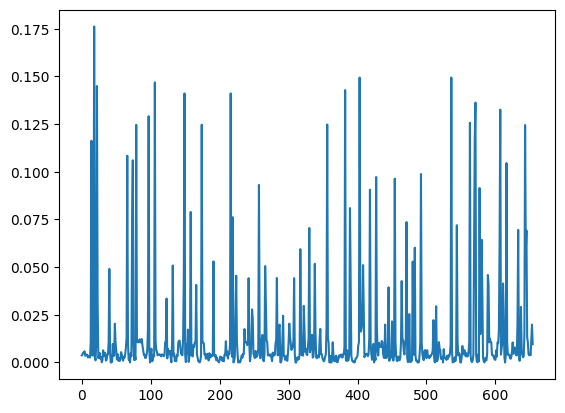

Reconstruction error threshold: 0.17616318687731508
number :  10
18/18 [==============================] - 0s 4ms/step
(557,)


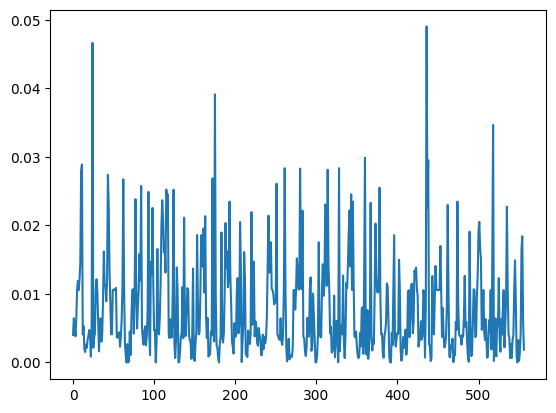

Reconstruction error threshold: 0.049018435411340634
number :  11
25/25 [==============================] - 0s 4ms/step
(777,)


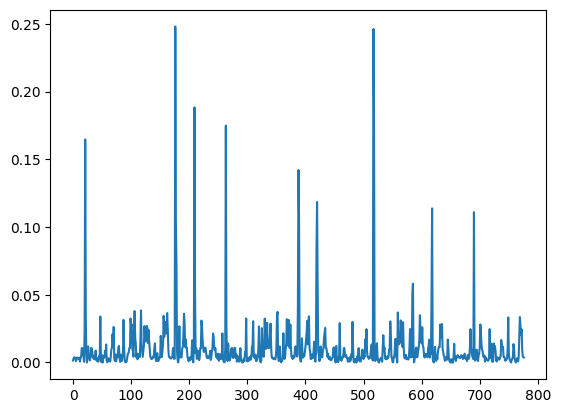

Reconstruction error threshold: 0.24803830124236717
number :  12
24/24 [==============================] - 0s 4ms/step
(757,)


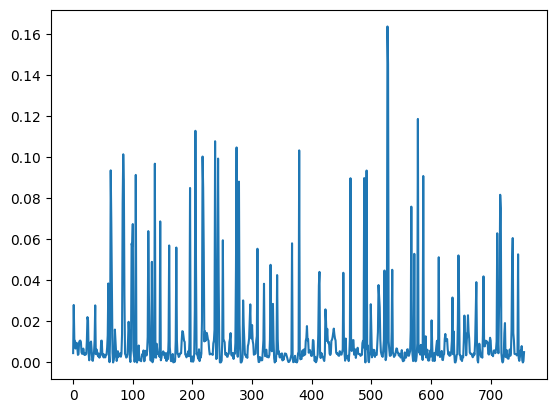

Reconstruction error threshold: 0.16360635715042704
number :  13
19/19 [==============================] - 0s 4ms/step
(578,)


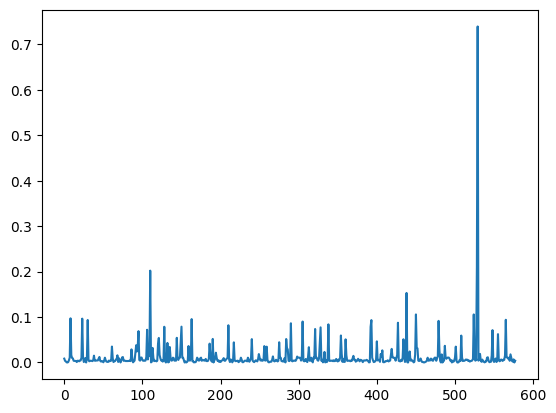

Reconstruction error threshold: 0.7394827947149507
number :  14
9/9 [==============================] - 0s 4ms/step
(280,)


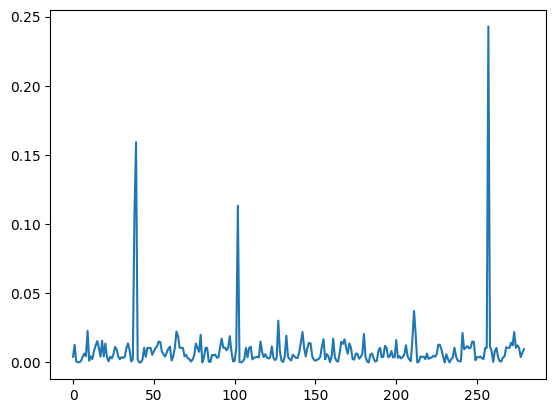

Reconstruction error threshold: 0.24290832516315328
number :  15
15/15 [==============================] - 0s 4ms/step
(463,)


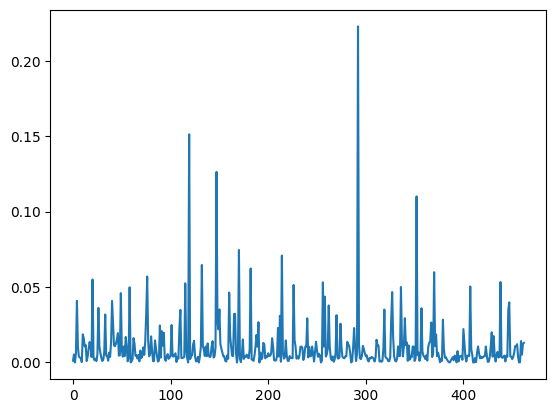

Reconstruction error threshold: 0.22266577154420406
number :  16
11/11 [==============================] - 0s 4ms/step
(327,)


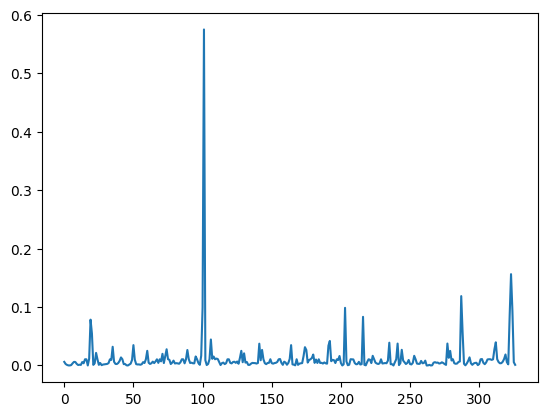

Reconstruction error threshold: 0.5751865406938881
number :  18
20/20 [==============================] - 0s 4ms/step
(623,)


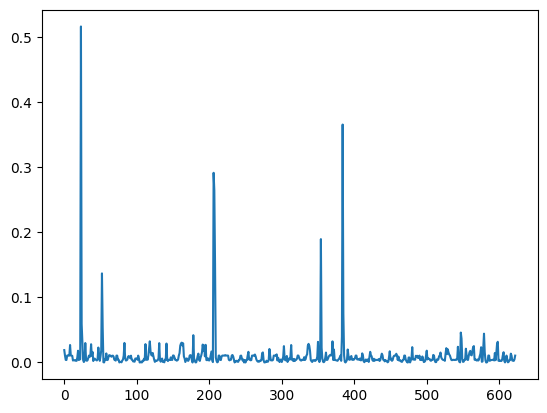

Reconstruction error threshold: 0.5163944670005035
number :  19
14/14 [==============================] - 0s 4ms/step
(441,)


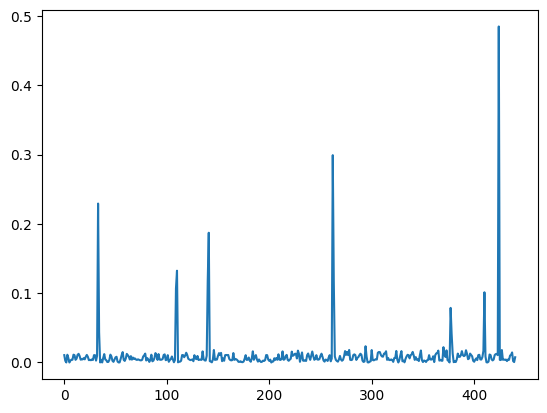

Reconstruction error threshold: 0.4849109841077068
number :  20
18/18 [==============================] - 0s 4ms/step
(567,)


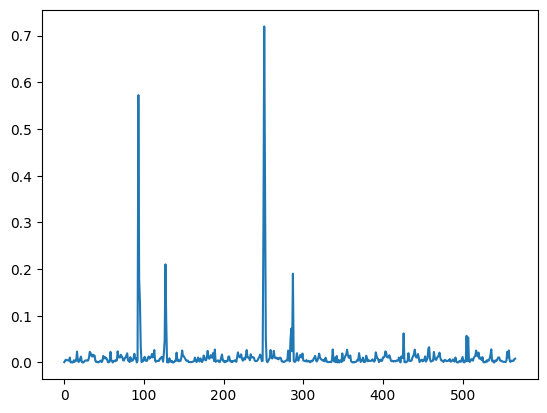

Reconstruction error threshold: 0.7195219657837497
number :  21
18/18 [==============================] - 0s 4ms/step
(553,)


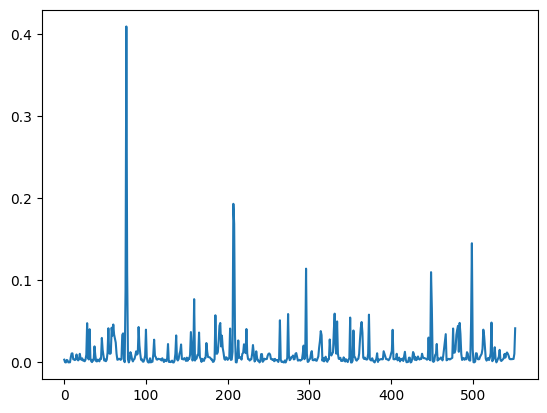

Reconstruction error threshold: 0.40923102306860326
number :  22
7/7 [==============================] - 0s 4ms/step
(207,)


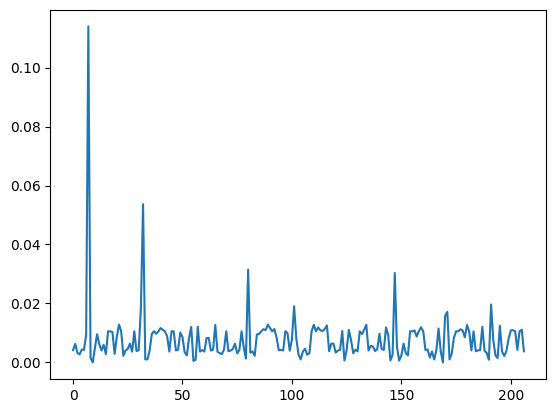

Reconstruction error threshold: 0.11391031733096203
number :  26
15/15 [==============================] - 0s 4ms/step
(457,)


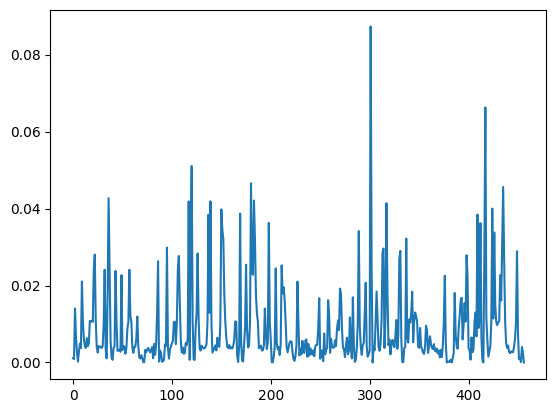

Reconstruction error threshold: 0.08730041146682781
number :  27
8/8 [==============================] - 0s 4ms/step
(240,)


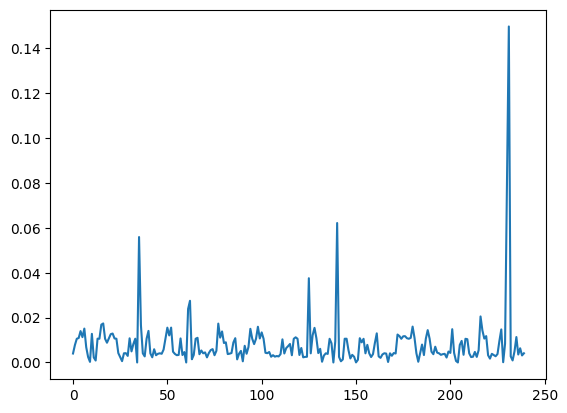

Reconstruction error threshold: 0.1497101671083382
number :  28
7/7 [==============================] - 0s 4ms/step
(199,)


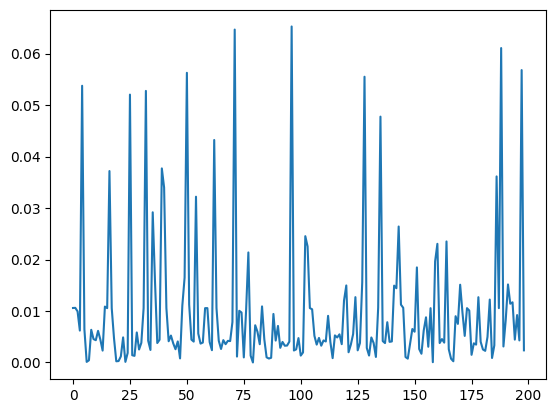

Reconstruction error threshold: 0.06528297760593695
number :  29
7/7 [==============================] - 0s 4ms/step
(197,)


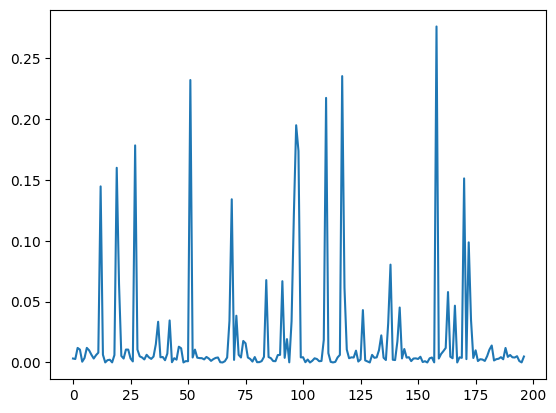

Reconstruction error threshold: 0.2760160380857538
number :  30
3/3 [==============================] - 0s 4ms/step
(70,)


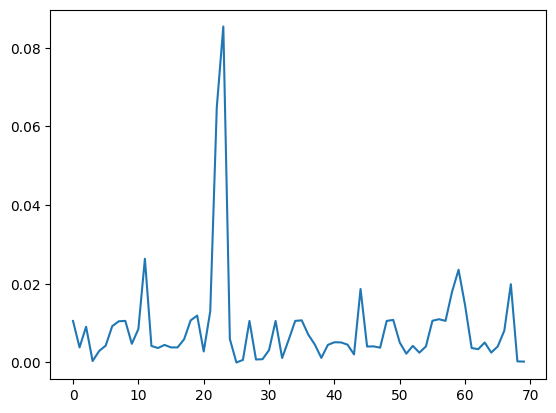

Reconstruction error threshold: 0.0854283540210277


In [16]:
threshold = []
for i in train_num:
    number_num = number[number["num"]== i].dropna()
    print("number : ",i)
    number_num = number_num[[angle]]
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
    train_x_predictions = lstm_ae.predict(number_num)
    train_mae_loss = np.mean(np.power(train_x_predictions - number_num,2), axis=1)
    train_mae_loss = train_mae_loss.flatten()
    
    print(train_mae_loss.shape)
    plt.plot(train_mae_loss)
    plt.show()
    
    train_mae_loss_max = np.max(train_mae_loss)
    threshold.append(train_mae_loss_max )
    
    print(f'Reconstruction error threshold: {train_mae_loss_max }')

In [18]:
threshold_ave = np.mean(threshold)
threshold_ave

0.374709581559041

In [19]:
# print(epochs,"/" , lr ,"/",  threshold_ave)

=========================================================

# SA TEST

In [20]:
sar_csv = os.listdir("test/sar_long_in/")

In [39]:
# for i in sar_csv:
#     name = i[:-4]
#     path = "test/sar_long/"+str(i)
#     print("patient_number : ",i)
#     test_sheet = pd.read_csv(path, index_col = 0).dropna()
#     test_num = test_sheet[[angle]]
#     test_num = scaler.fit_transform(test_num)
#     test = np.reshape(test_num,(test_num.shape[0],1,1))
#     test_x_predictions = lstm_ae.predict(test)
#     test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
#     real_a_point = test_sheet['tick']
#     real_a_point_list = real_a_point.to_numpy().astype(int)

#     print(len(real_a_point_list))
#     print(len(test_mae_loss))
    
#     plt.grid()
#     plt.title(angle+" : "+name)
#     plt.plot(test_mae_loss)
#     plt.axhline(y=threshold_ave, color='red', linewidth=2)

#     for j in range(len(real_a_point_list)):
#         if test_mae_loss[j] >= threshold_ave:
#             plt.scatter(j, test_mae_loss[j],c='r')
            
#     # plt.savefig(f"{angle}_{i}.jpg")
#     # plt.show()
#     # plt.savefig("SAR_{}_{}".format(angle,i))
#     plt.savefig(f"{angle}_{name}.jpg")
#     plt.show()
    

    
#     loss_max = np.max(test_mae_loss)
#     print(f'Reconstruction error threshold: {loss_max}')

-Patient_number :  03.csv
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step
-Data len : 142
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13864233777604962
-Anomaly points: 0


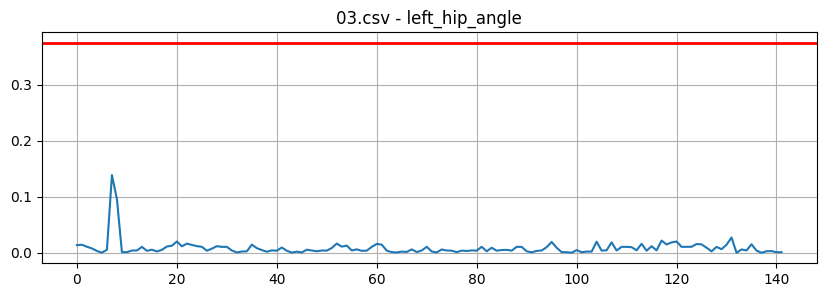

-Patient_number :  07.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 129
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.20604516548859184
-Anomaly points: 0


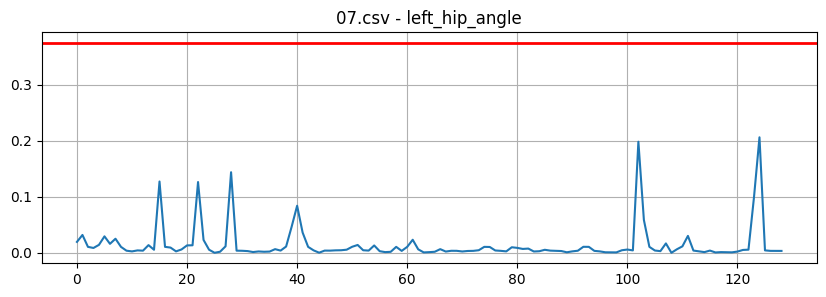

-Patient_number :  115.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 110
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0381388685241823
-Anomaly points: 0


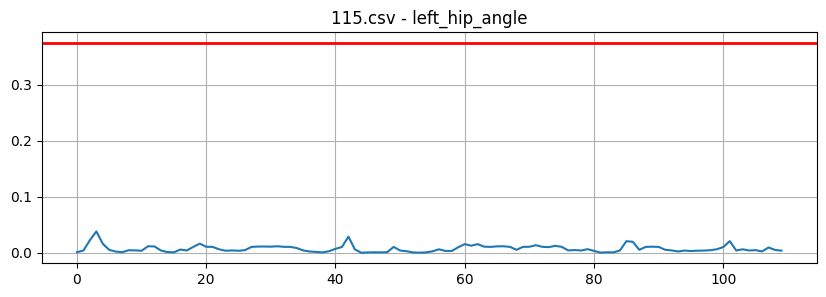

-Patient_number :  120.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 249
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.8047685982265081
-Anomaly points: 1


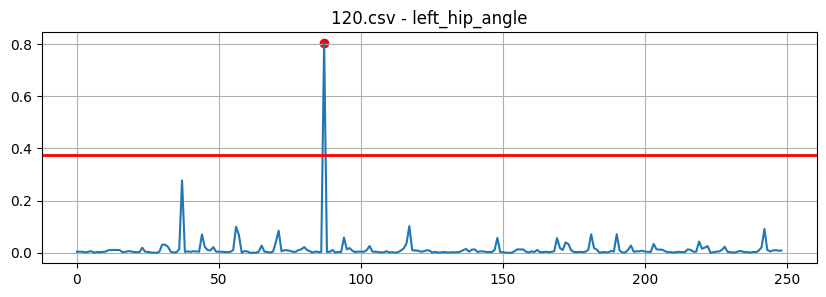

-Patient_number :  123.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 157
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1668076356005613
-Anomaly points: 0


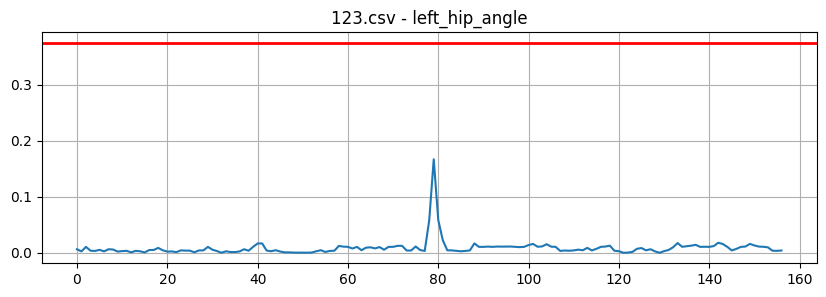

-Patient_number :  141.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 176
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.8177956732475399
-Anomaly points: 1


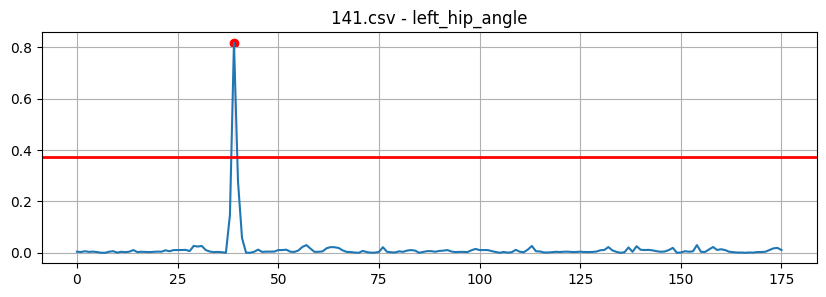

-Patient_number :  143.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 178
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13319046495851014
-Anomaly points: 0


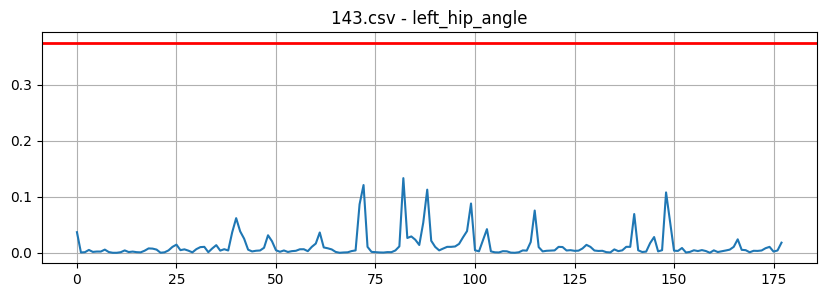

-Patient_number :  151.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 239
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10321835817651304
-Anomaly points: 0


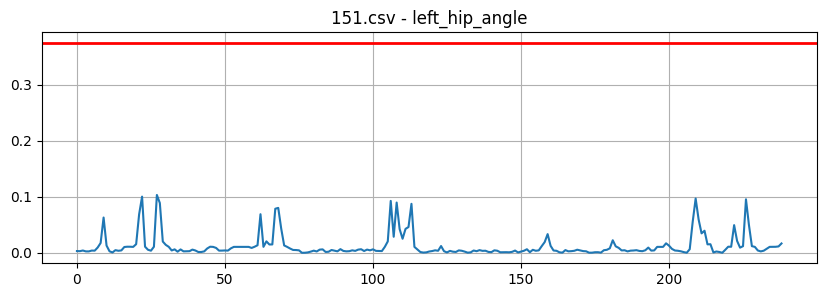

-Patient_number :  154.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 230
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.07866667515257462
-Anomaly points: 0


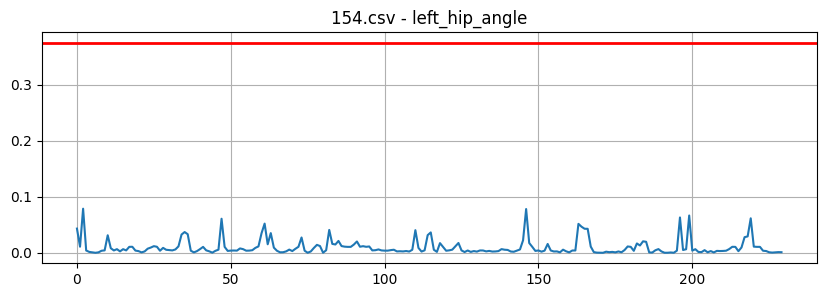

-Patient_number :  166.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 202
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.5253674564579954
-Anomaly points: 1


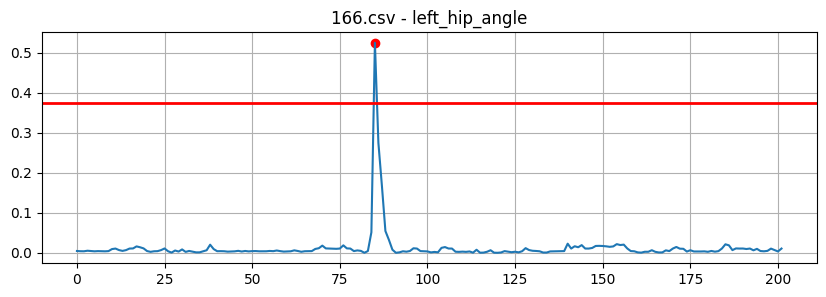

-Patient_number :  178.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 233
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08332518202841313
-Anomaly points: 0


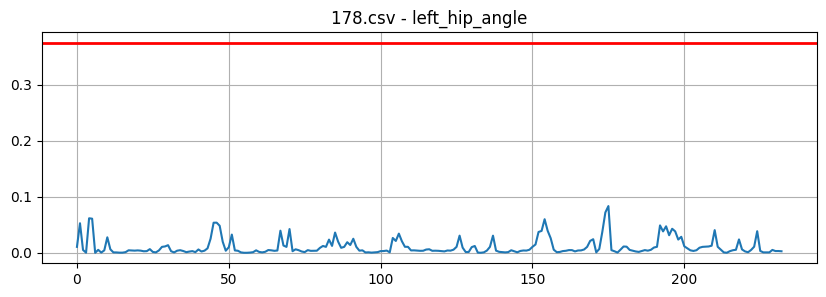

-Patient_number :  189.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1263757007832132
-Anomaly points: 0


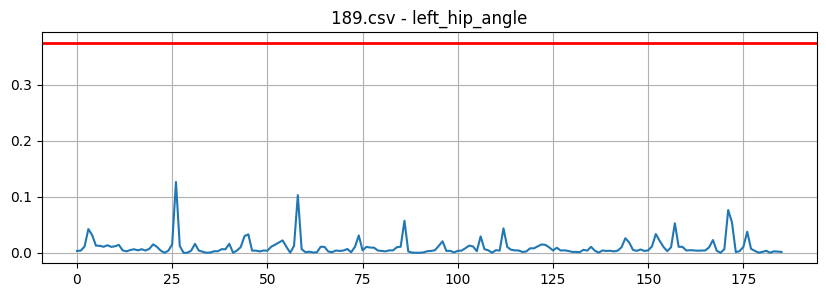

-Patient_number :  195.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 108
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.15724127173904032
-Anomaly points: 0


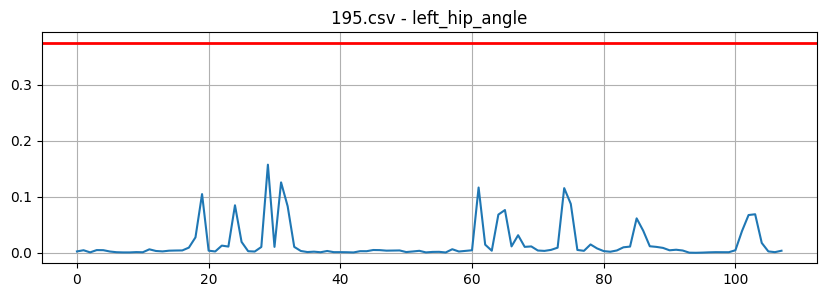

-Patient_number :  198.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 207
-max_anomaly :  0.768054688241926
-min_anomaly :  0.37830593666902723
-Anomaly Area : 0.5731803124554766
-Reconstruction error threshold : 0.768054688241926
-Anomaly points: 2


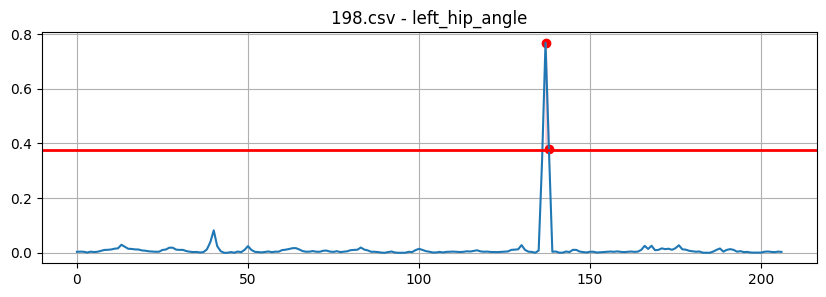

-Patient_number :  199.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 210
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1298873692515536
-Anomaly points: 0


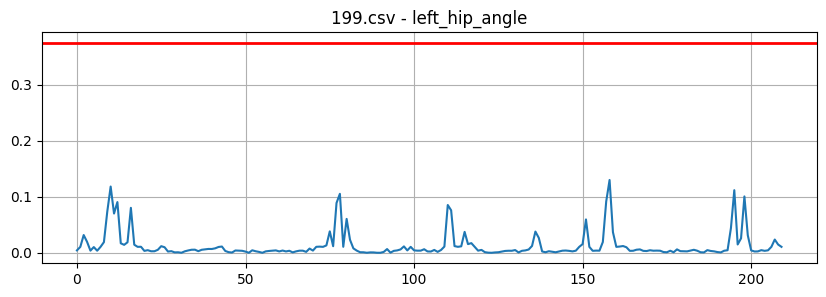

-Patient_number :  206.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 227
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09172640680757092
-Anomaly points: 0


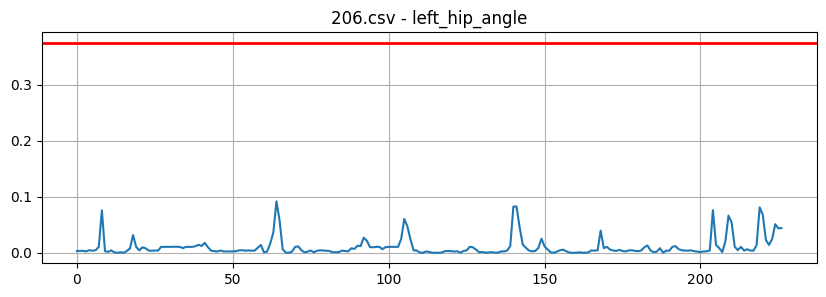

-Patient_number :  208.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 182
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4078363377147697
-Anomaly points: 1


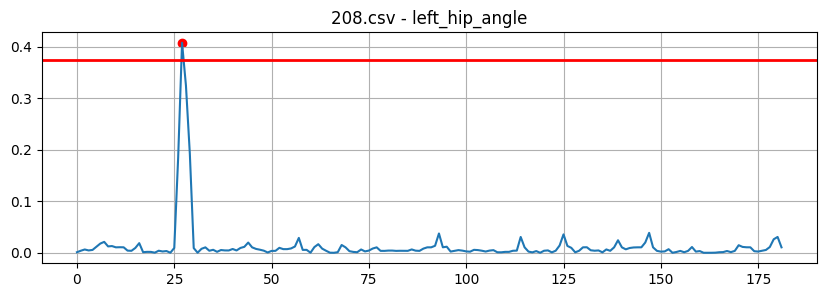

-Patient_number :  209.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 126
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10765699831976293
-Anomaly points: 0


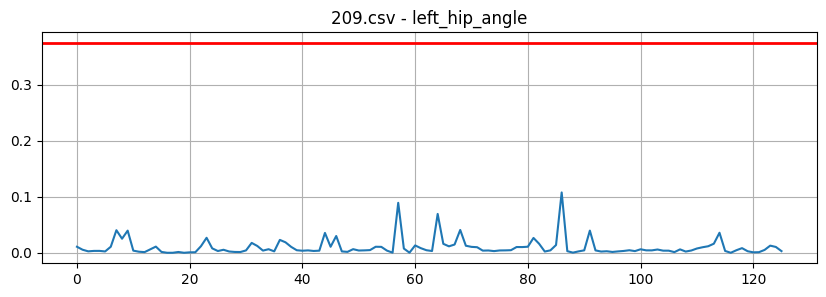

-Patient_number :  216.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 111
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.34699225957703744
-Anomaly points: 0


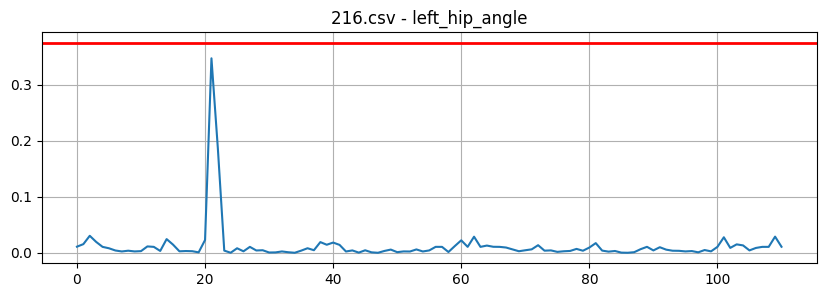

-Patient_number :  23.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 146
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.17691558091868834
-Anomaly points: 0


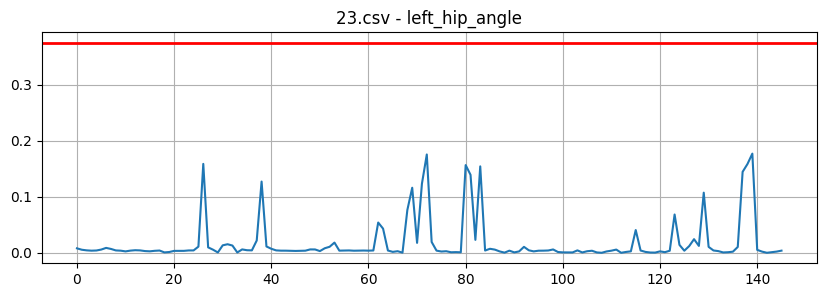

-Patient_number :  230.csv
8/8 [==============================] - 0s 6ms/step
-Data len : 229
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.17089921771892114
-Anomaly points: 0


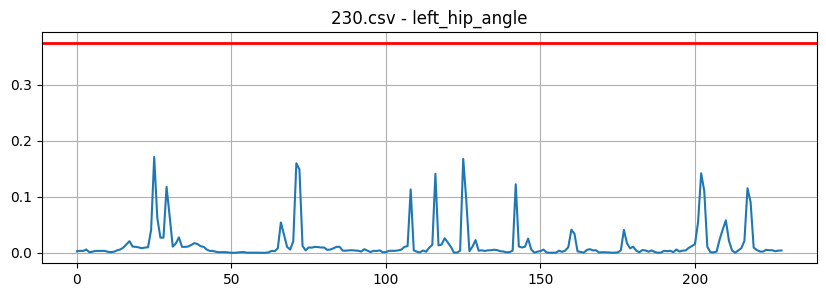

-Patient_number :  244.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 198
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09159870747821723
-Anomaly points: 0


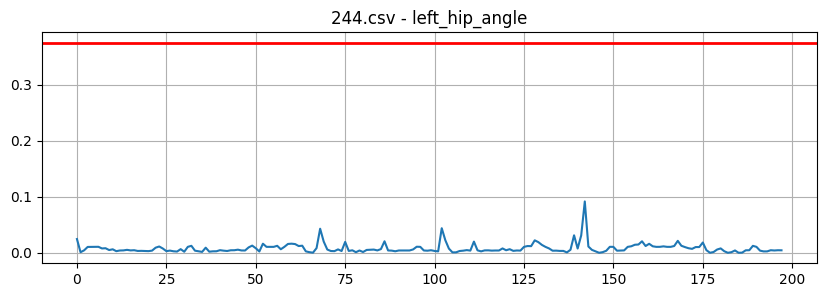

-Patient_number :  264.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 254
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08067289874590568
-Anomaly points: 0


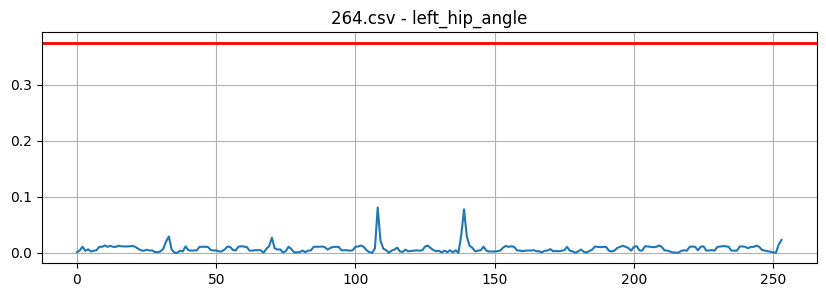

-Patient_number :  275.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 264
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.9931065356207437
-Anomaly points: 1


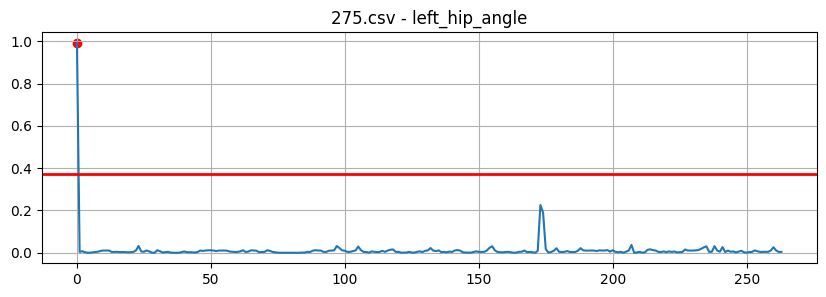

-Patient_number :  278.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 292
-max_anomaly :  0.7318600368692434
-min_anomaly :  0.729368951890693
-Anomaly Area : 0.7306144943799682
-Reconstruction error threshold : 0.7318600368692434
-Anomaly points: 2


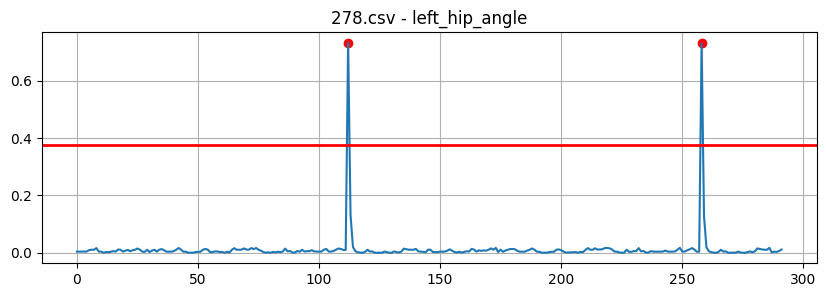

-Patient_number :  28.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 248
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.15019987243026753
-Anomaly points: 0


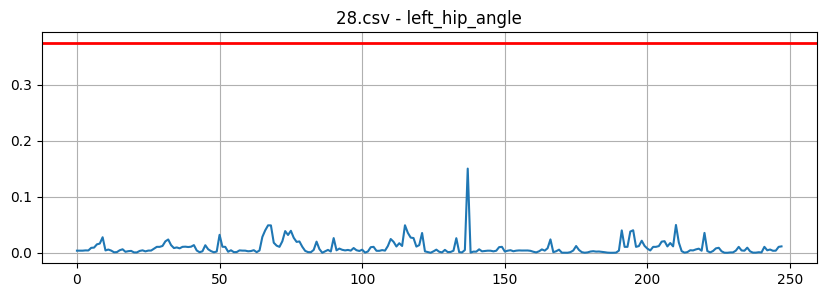

-Patient_number :  284.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 122
-Anomaly Area : 0.0
-Reconstruction error threshold : 1.2213898569378927
-Anomaly points: 1


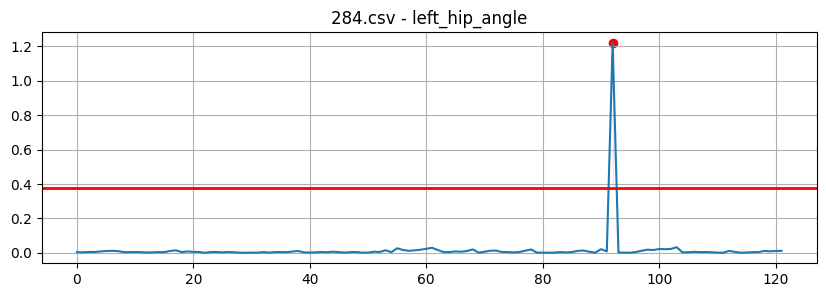

-Patient_number :  285.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 235
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1017646980646435
-Anomaly points: 0


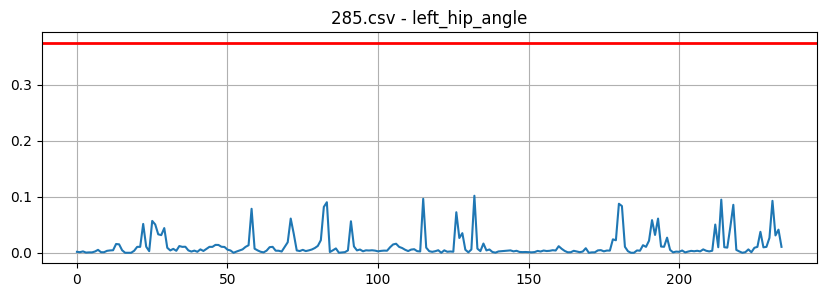

-Patient_number :  286.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 162
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.18051831802732476
-Anomaly points: 0


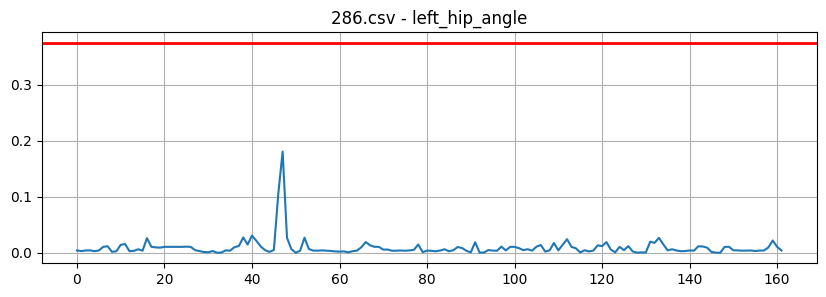

-Patient_number :  287.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 234
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.26059792929306047
-Anomaly points: 0


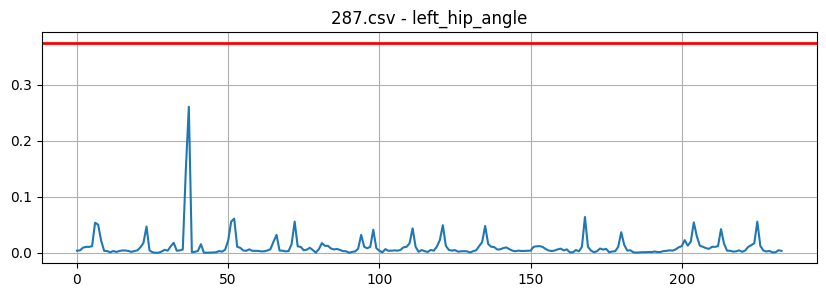

-Patient_number :  298.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 168
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.6022467349956491
-Anomaly points: 1


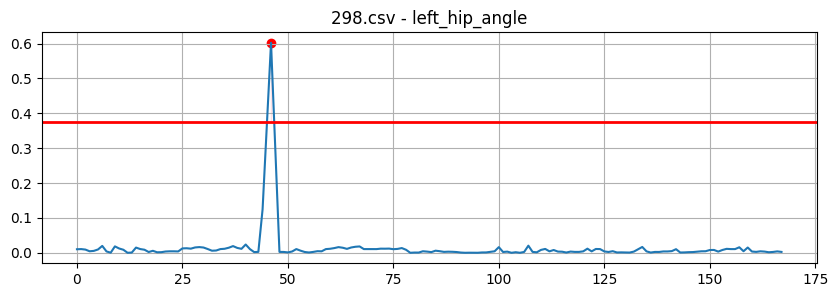

-Patient_number :  333.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 246
-max_anomaly :  1.0469715049879293
-min_anomaly :  0.7364858415212541
-Anomaly Area : 1.7962338996890037
-Reconstruction error threshold : 1.0469715049879293
-Anomaly points: 3


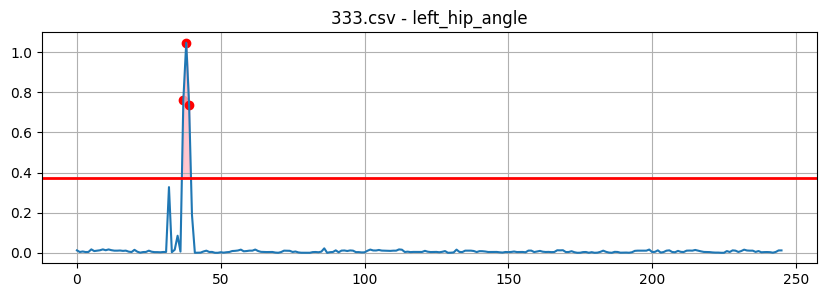

-Patient_number :  337.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 172
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.22614346951562786
-Anomaly points: 0


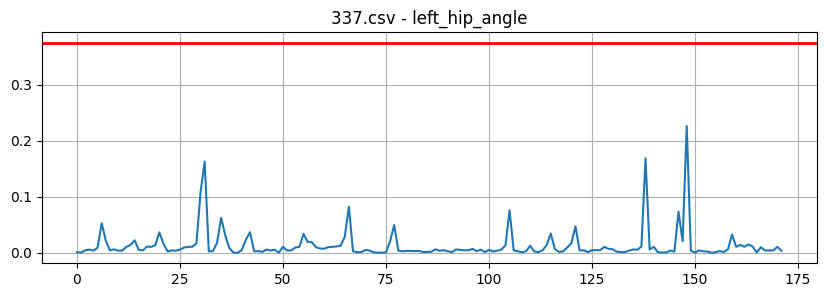

-Patient_number :  338.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 152
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.21367763085753178
-Anomaly points: 0


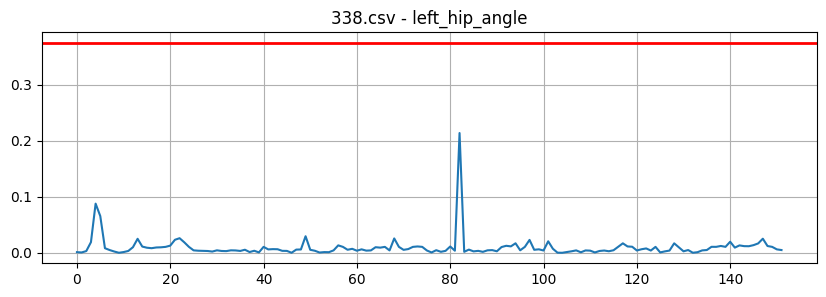

-Patient_number :  340.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 165
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.03791673614262814
-Anomaly points: 0


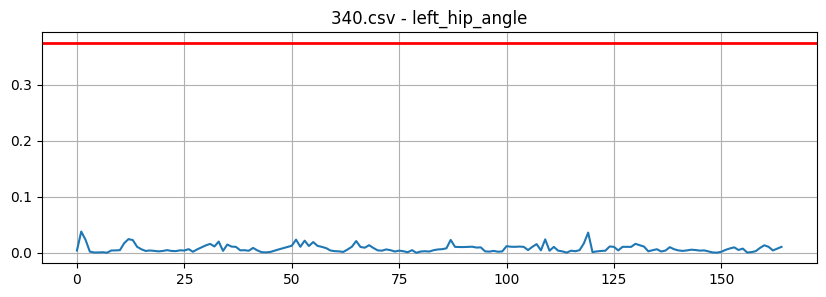

-Patient_number :  341.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 183
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.31527164433314286
-Anomaly points: 0


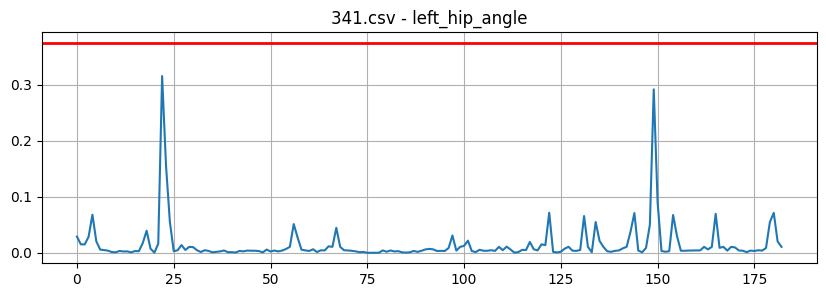

-Patient_number :  344.csv
7/7 [==============================] - 0s 3ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11617095092205115
-Anomaly points: 0


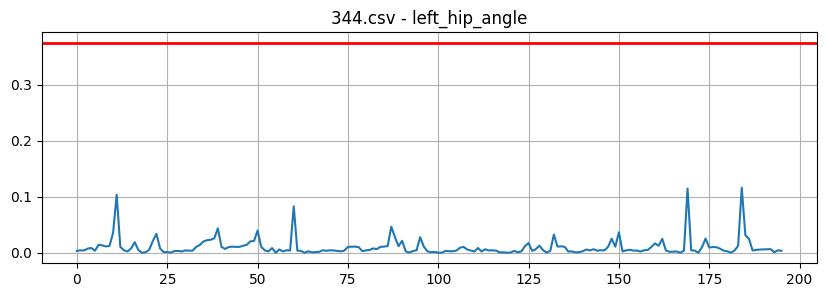

-Patient_number :  354.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 263
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.20238142953076071
-Anomaly points: 0


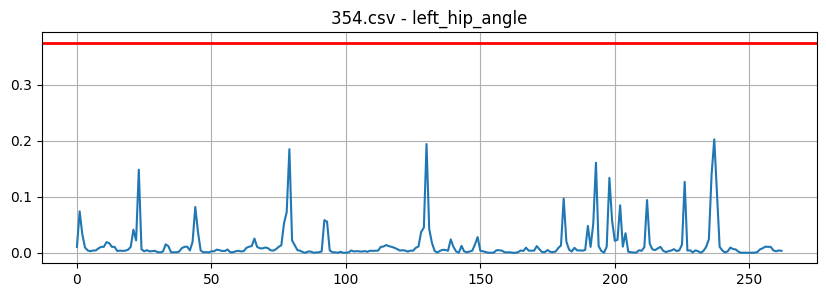

-Patient_number :  356.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 228
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.34836398567685134
-Anomaly points: 0


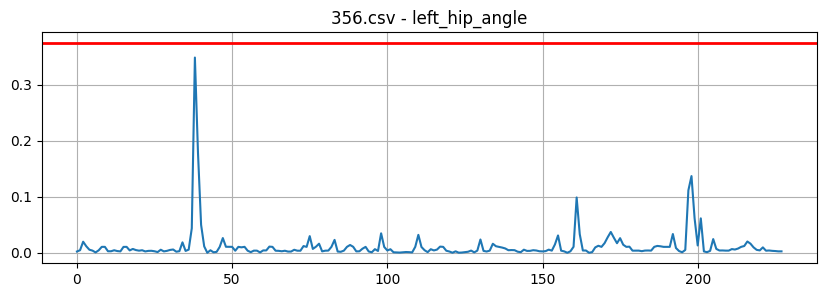

-Patient_number :  358.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 236
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.29037935489882594
-Anomaly points: 0


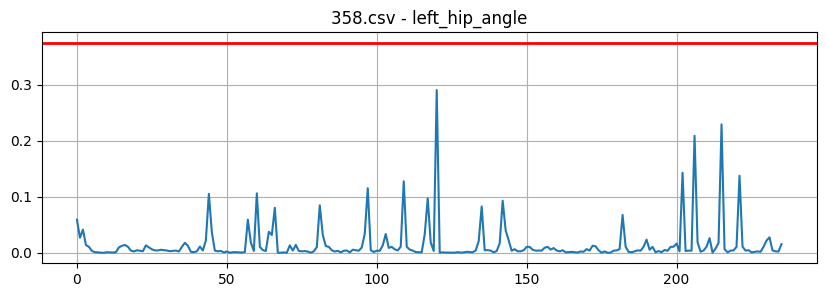

-Patient_number :  36.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 215
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.17970399432292827
-Anomaly points: 0


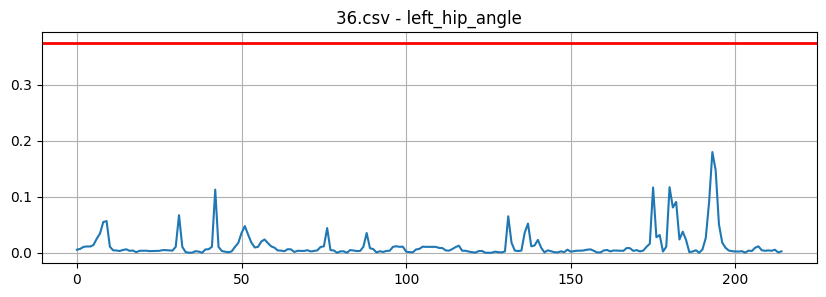

-Patient_number :  360.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.29187528512957295
-Anomaly points: 0


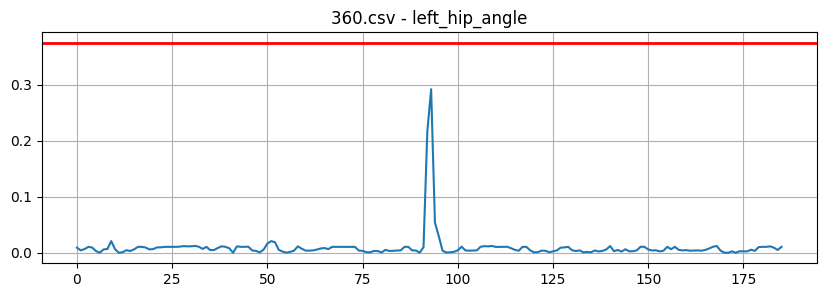

-Patient_number :  364.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 195
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08249146887295378
-Anomaly points: 0


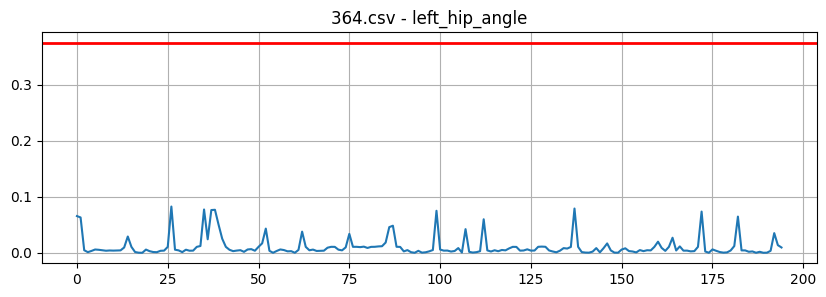

-Patient_number :  365.csv
2/2 [==============================] - 0s 5ms/step
-Data len : 63
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.10836889990203108
-Anomaly points: 0


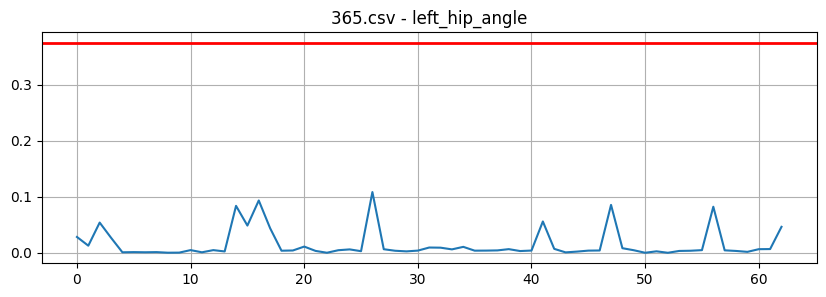

-Patient_number :  367.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 259
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09027291248088434
-Anomaly points: 0


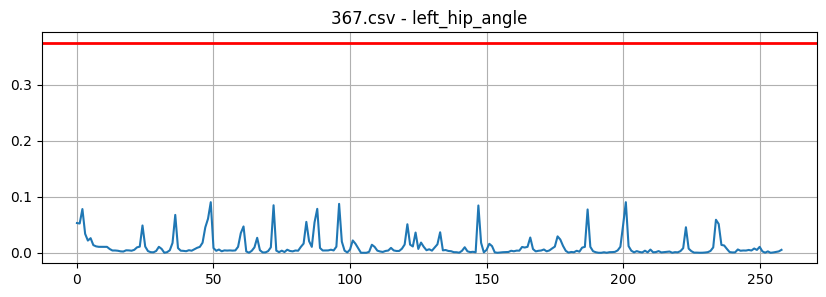

-Patient_number :  369.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 134
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.077870632776632
-Anomaly points: 0


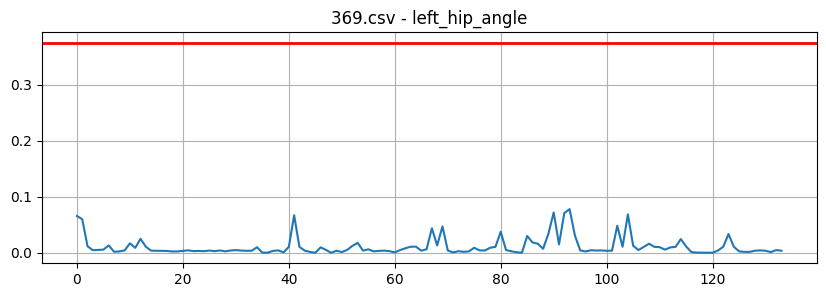

-Patient_number :  391.csv
12/12 [==============================] - 0s 5ms/step
-Data len : 362
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2805975141185223
-Anomaly points: 0


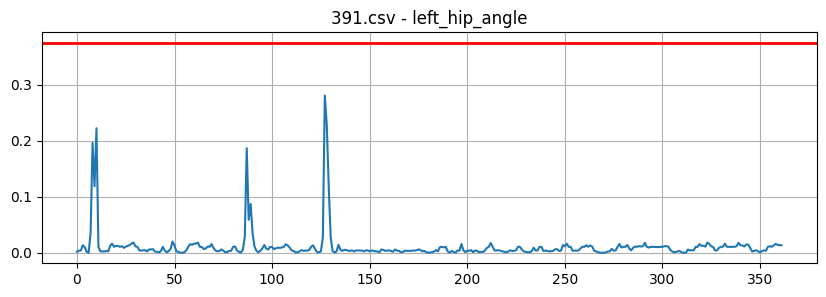

-Patient_number :  398.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 238
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08557904227751388
-Anomaly points: 0


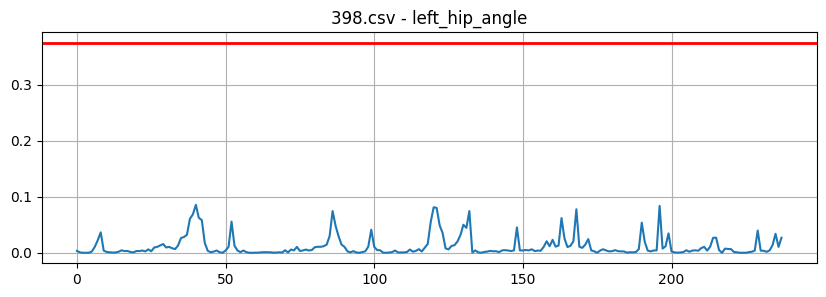

-Patient_number :  400.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 148
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.7659949615007139
-Anomaly points: 1


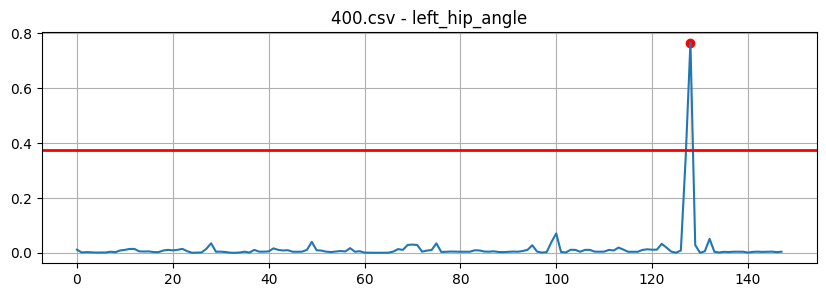

-Patient_number :  412.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 128
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08288626943540793
-Anomaly points: 0


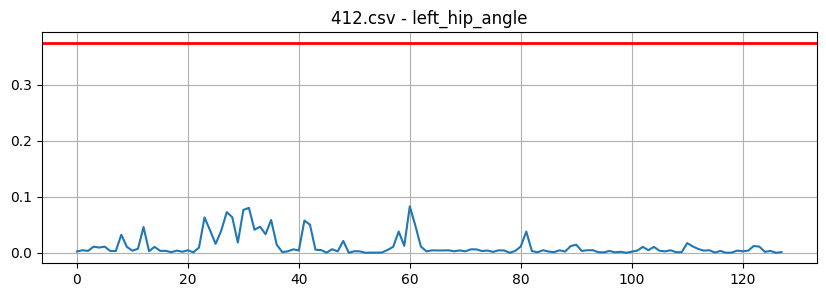

-Patient_number :  414.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 135
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.05309494288198443
-Anomaly points: 0


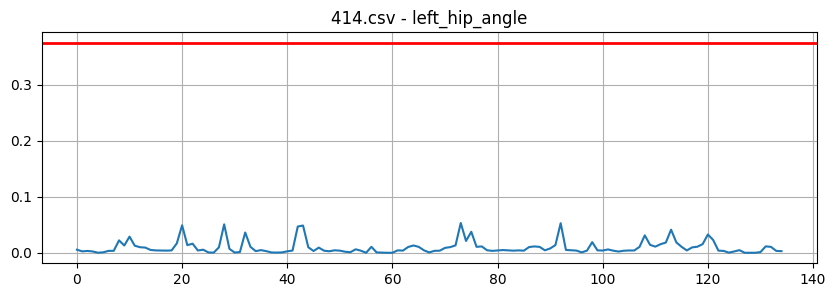

-Patient_number :  420.csv
3/3 [==============================] - 0s 4ms/step
-Data len : 95
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.04000167546986096
-Anomaly points: 0


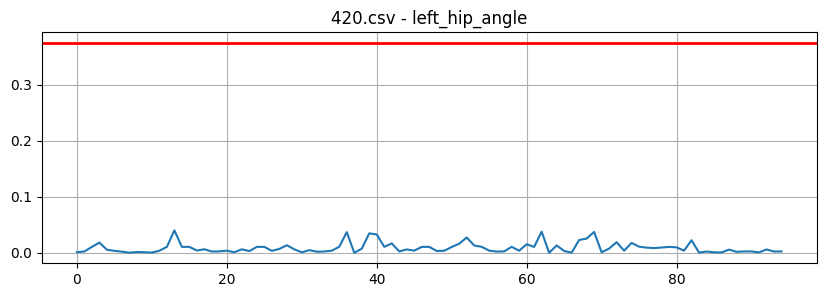

-Patient_number :  423.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 121
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.04010130400854691
-Anomaly points: 0


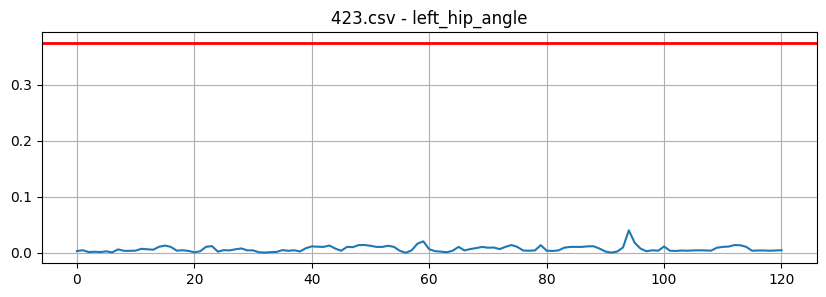

-Patient_number :  428.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2595472939490517
-Anomaly points: 0


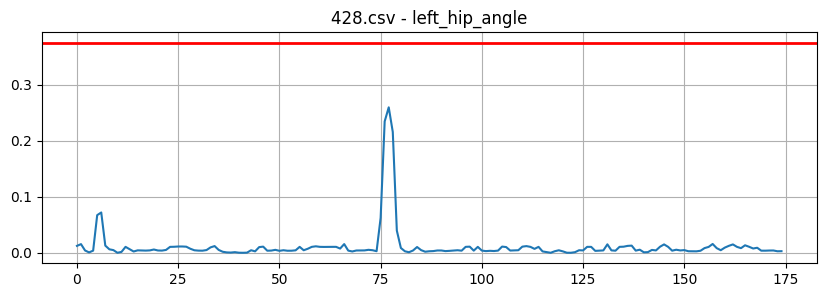

-Patient_number :  43.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0999937326436408
-Anomaly points: 0


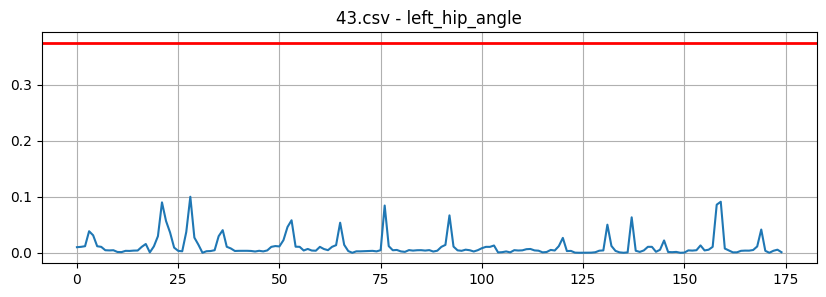

-Patient_number :  432.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 173
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.36794462625609237
-Anomaly points: 0


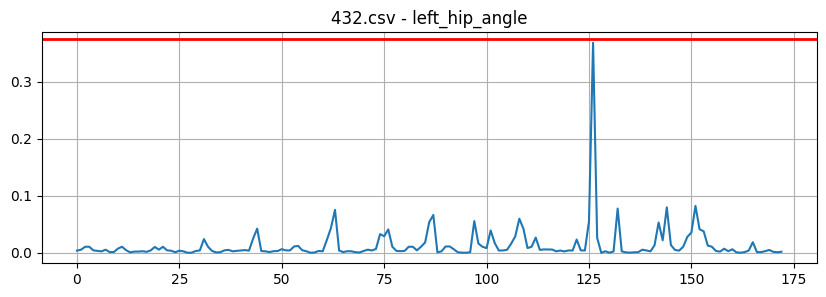

-Patient_number :  436.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 302
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2819538426563639
-Anomaly points: 0


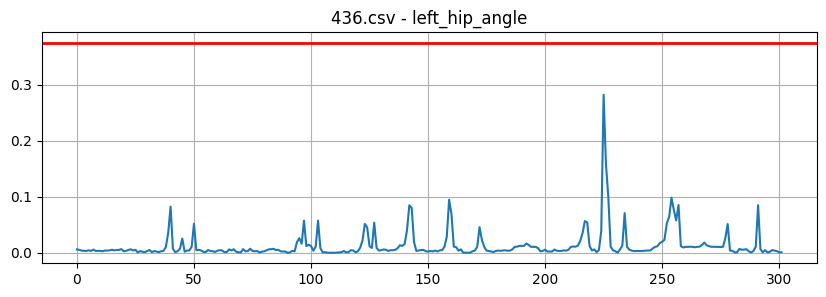

-Patient_number :  445.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.37374406752338835
-Anomaly points: 0


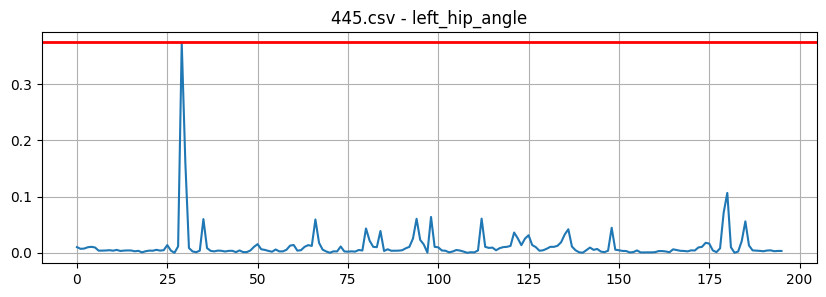

-Patient_number :  56.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 219
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.20702853479483052
-Anomaly points: 0


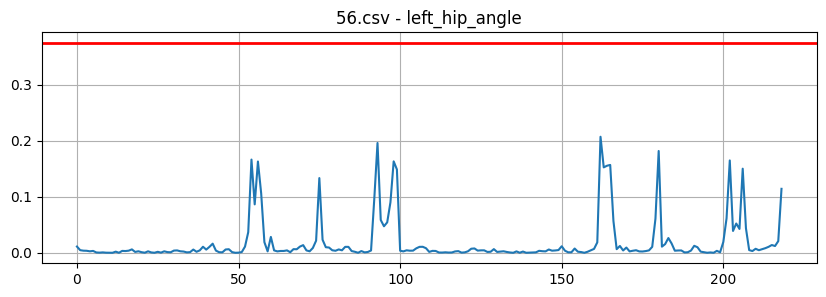

-Patient_number :  61.csv
4/4 [==============================] - 0s 5ms/step
-Data len : 101
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2883041531190768
-Anomaly points: 0


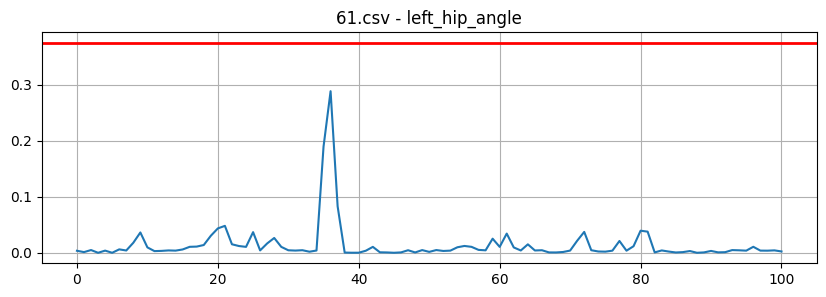

-Patient_number :  84.csv
7/7 [==============================] - 0s 5ms/step
-Data len : 217
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.146435324655113
-Anomaly points: 0


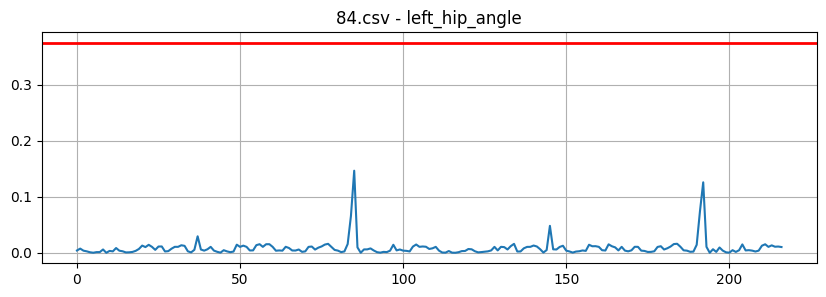

-Patient_number :  85.csv
5/5 [==============================] - 0s 5ms/step
-Data len : 131
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.046554727712883895
-Anomaly points: 0


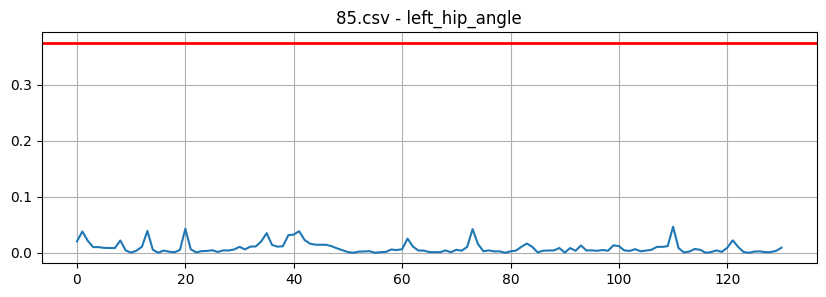

-Patient_number :  91.csv
8/8 [==============================] - 0s 6ms/step
-Data len : 232
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1132643911831099
-Anomaly points: 0


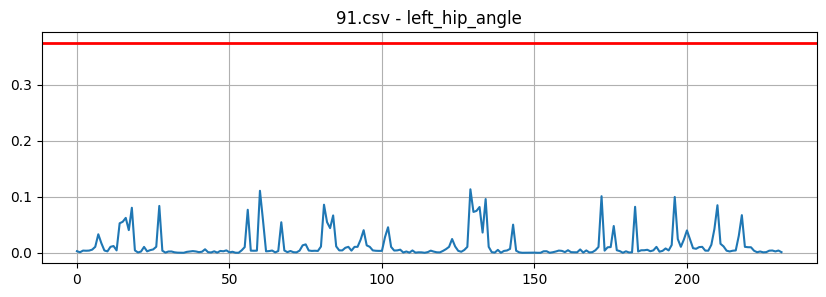

-Patient_number :  97.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 188
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1410781717991797
-Anomaly points: 0


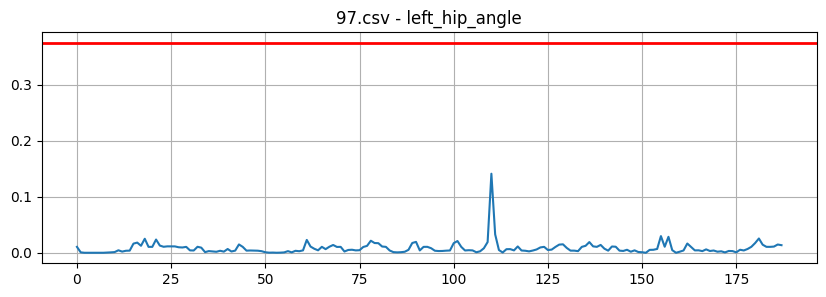

In [21]:
# inte_li = []
# indices = []
data_len = []
total_anomaly = []
total_anomaly_area = []
cont=0

for i in sar_csv:
    print("====================================================================================================")
    path = "test/sar_long_in/"+str(i)
    print("-Patient_number : ",i)
    
    test_sheet = pd.read_csv(path, index_col = 0).dropna()
    test_num = test_sheet[[angle]]
    test_num = scaler.fit_transform(test_num)
    test = np.reshape(test_num,(test_num.shape[0],1,1))
    test_x_predictions = lstm_ae.predict(test)
    test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
    real_a_point = test_sheet['tick']
    real_a_point_list = real_a_point.to_numpy().astype(int)
    
    ra = len(real_a_point_list)
    ta=len(test_mae_loss)
    
    if ra == ta:
        print("-Data len :",ta)
    
    data_len.append(ta)

    plt.figure(figsize = (10,3))
    plt.plot(test_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=2)
    
    red_t = [] # 이상치 갯수 리스트 
    inte_li = []
    indices = []
    data_len = []
    

    red = 0
    
    for j in range(len(real_a_point_list)):
        
        if test_mae_loss[j] >= threshold_ave:
            above_threshold = test_mae_loss >= threshold_ave
            below_threshold = np.logical_not(above_threshold)
            plt.fill_between(np.arange(len(test_mae_loss)), test_mae_loss, threshold_ave, where=above_threshold, color='pink', alpha=0.5) #임계갓 윗 부분
            # plt.fill_betweenx(y=[0,threshold_ave], x1=j, x2=j+1, color='pink') #임계갓 아랫 부분 
            plt.scatter(j, test_mae_loss[j],c='r')
            red = 1
            inte = (test_mae_loss[j])

            inte_li.append(inte) # 이상치 값
            red_t.append(red) # 이상치 갯수 카운트 
            indices.append(j) # 이상치 인덱스 
            total_anomaly.append(inte)
            
    # print("-Anomaly_data : ",inte_li)
    
    if len(red_t) >= 2:
        print("-max_anomaly : ",max(inte_li))
        print("-min_anomaly : ",min(inte_li))

        
    # if len(red_t) <= 10:
    #     print("-중증도 : 1단계")
    # elif len(red_t) >= 10:
    #     print("-중증도 : 2단계")
    # else:
    #     print("-중증도 : 3단계")
    
    if red == 1:
        cont += 1
    
    loss_max = np.max(test_mae_loss)
    anomaly_area = np.trapz(inte_li)
    # total_anomaly_area.append(anomaly_area)
    
    plt.title(i + " - " + angle)
    plt.grid()
    name = i[:-4]
    # plt.savefig(name)
    
    print("-Anomaly Area :", anomaly_area)
    print(f'-Reconstruction error threshold : {loss_max}')
    print("-Anomaly points:",len(red_t))
    
    
    plt.show()


In [22]:
print("이상탐지 환자 수 : ",cont)

이상탐지 환자 수 :  11


=========================================================

# Nomal TEST

In [39]:
number_num = number[number["num"]== 23]
number_num

,num,left_hip_angle
12575,23,2.723323
12576,23,5.300610
12577,23,9.706610
12578,23,11.526749
12579,23,13.180125
...,...,...
13003,23,11.587535
13004,23,8.681494
13005,23,12.789407
13006,23,10.846172


In [44]:
test_num = [23, 24, 25]

In [40]:
for i in test_num:
    number_num = number[number["num"]== i]
    number_num = number_num[[angle]]
    # number_num
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    test_no_x_predictions= lstm_ae.predict(number_num)
    test_no_mae_loss = np.mean(np.power(test_no_x_predictions - number_num,2), axis=1).flatten()
    print(len(test_no_mae_loss))
    
    real_a_point_list = len(test_no_mae_loss)
    # real_a_point_list = real_a_point.to_numpy().astype(int)
    
    plt.figure(figsize = (10,3))
    plt.plot(test_no_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=1)
    plt.grid()
    
    for j in range (real_a_point_list) :
        if test_no_mae_loss[j] >= threshold_ave:
            plt.scatter(j, test_no_mae_loss[j],c='r')         
    
    
    
    plt.show()

ValueError: ('Lengths must match to compare', (14916,), (1,))